# Spotify Top 10000 Streamed Songs

## Step 1: Select a real-world dataset

## Description of the dataframe: 
### 1. Position - Spotify Ranking of the song
### 2. Artist Name - Name of the Artist or Band
### 3. Song Name - Name of the Song
### 4. Days - Number of Days since the release of the song
### 5. Top 10 (xTimes) - Number of times Entered into the Top 10
### 6. Peak Position - Peak position attained
### 7. Peak Position (xTimes) - Number of Times that Peak Position has been Attained
### 8. Peak Streams - Total Streams while in Peak Position
### 9. Total Streams - Total number of streams

## Step 2: Perform data preparation and cleaning

In [1]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [2]:
spotify_dataframe = pd.read_csv('Spotify_final_dataset.csv')
spotify_dataframe.head()

,Position,Artist Name,Song Name,Days,Top 10 (xTimes),Peak Position,Peak Position (xTimes),Peak Streams,Total Streams
0,1,Post Malone,Sunflower SpiderMan: Into the SpiderVerse,1506,302.0,1,(x29),2118242,883369738
1,2,Juice WRLD,Lucid Dreams,1673,178.0,1,(x20),2127668,864832399
2,3,Lil Uzi Vert,XO TOUR Llif3,1853,212.0,1,(x4),1660502,781153024
3,4,J. Cole,No Role Modelz,2547,6.0,7,0,659366,734857487
4,5,Post Malone,rockstar,1223,186.0,1,(x124),2905678,718865961


In [3]:
print("Number of rows in the dataset",spotify_dataframe.shape[0])
print("Number of columns in the dataset",spotify_dataframe.shape[1])

Number of rows in the dataset 11084
Number of columns in the dataset 9


In [4]:
spotify_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11084 entries, 0 to 11083
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Position                11084 non-null  int64  
 1   Artist Name             11084 non-null  object 
 2   Song Name               11080 non-null  object 
 3   Days                    11084 non-null  int64  
 4   Top 10 (xTimes)         11084 non-null  float64
 5   Peak Position           11084 non-null  int64  
 6   Peak Position (xTimes)  11084 non-null  object 
 7   Peak Streams            11084 non-null  int64  
 8   Total Streams           11084 non-null  int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 779.5+ KB


### Observations:
#### 1. Position, Days, Peak Position, Peak Streams and Total Streams are Integer type
#### 2. Top 10 (xTimes) is Float type
#### 2. Artist Name, Song Name  and Peak Position  (xTimes) are objects

In [5]:
#printing missing values
missingValues = spotify_dataframe.isnull().sum()
missingValues

Position                  0
Artist Name               0
Song Name                 4
Days                      0
Top 10 (xTimes)           0
Peak Position             0
Peak Position (xTimes)    0
Peak Streams              0
Total Streams             0
dtype: int64

### Observations: 
#### We can see that Song Name has 4 missing values so we can drop those 4 rows.

In [6]:
spotify_dataframe= spotify_dataframe.dropna(subset=['Song Name'])

In [7]:
#printing missing values after dropping the rows where the Song Name is empty
missingValuesAfterDropping = spotify_dataframe.isnull().sum()
missingValuesAfterDropping

Position                  0
Artist Name               0
Song Name                 0
Days                      0
Top 10 (xTimes)           0
Peak Position             0
Peak Position (xTimes)    0
Peak Streams              0
Total Streams             0
dtype: int64

### Observations: 
#### There are no missing values now in the dataset

## Exploratory Data Analysis

In [8]:
spotify_dataframe.describe(include='all')

,Position,Artist Name,Song Name,Days,Top 10 (xTimes),Peak Position,Peak Position (xTimes),Peak Streams,Total Streams
count,11080.000000,11080,11080,11080.000000,11080.000000,11080.000000,11080,1.108000e+04,1.108000e+04
unique,NaN,1608,9992,NaN,NaN,NaN,57,NaN,NaN
top,NaN,Drake,Intro,NaN,NaN,NaN,0,NaN,NaN
freq,NaN,208,12,NaN,NaN,NaN,10594,NaN,NaN
mean,5542.053339,NaN,NaN,53.385289,2.714531,83.075090,NaN,5.528854e+05,1.831515e+07
std,3200.252113,NaN,NaN,129.770716,15.606874,58.933045,NaN,6.282888e+05,5.220222e+07
min,1.000000,NaN,NaN,1.000000,0.000000,1.000000,NaN,4.432300e+04,4.432300e+04
25%,2770.750000,NaN,NaN,2.000000,0.000000,29.000000,NaN,2.432120e+05,3.821432e+05
50%,5541.500000,NaN,NaN,7.000000,0.000000,75.000000,NaN,3.505885e+05,1.705556e+06
75%,8314.250000,NaN,NaN,39.000000,0.000000,132.000000,NaN,5.962590e+05,1.079192e+07


### Observations:
#### 1. Position: The index of the data, ranging from 1 to 11084.
#### 2. Artist Name: There are 1612 unique artist names, with Drake being the most frequent, appearing 208 times.
#### 3. Song Name: There are 9992 unique song names, with "Intro" by Drake being the most frequent, appearing 12 times.
#### 4. Days: The average number of days a song is on the chart is approximately 53.37, with a minimum of 1 day and a maximum of 2547 days.
#### 5. Top 10 (xTimes): The average number of times a song reaches the top 10 is approximately 2.71, with a minimum of 0 and a maximum of 302.
#### 6. Peak Position: The average peak position of a song is approximately 83.07, with a minimum of 1 and a maximum of 200.
#### 7. Peak Position (xTimes): The most common peak position is 10594 times.
#### 8. Peak Streams: The average number of peak streams is approximately 552,946.9, with a minimum of 44,323 and a maximum of 7,786,096.
#### 9. Total Streams: The average total streams for a song is approximately 18,308,910, with a minimum of 44,323 and a maximum of 883,369,700.

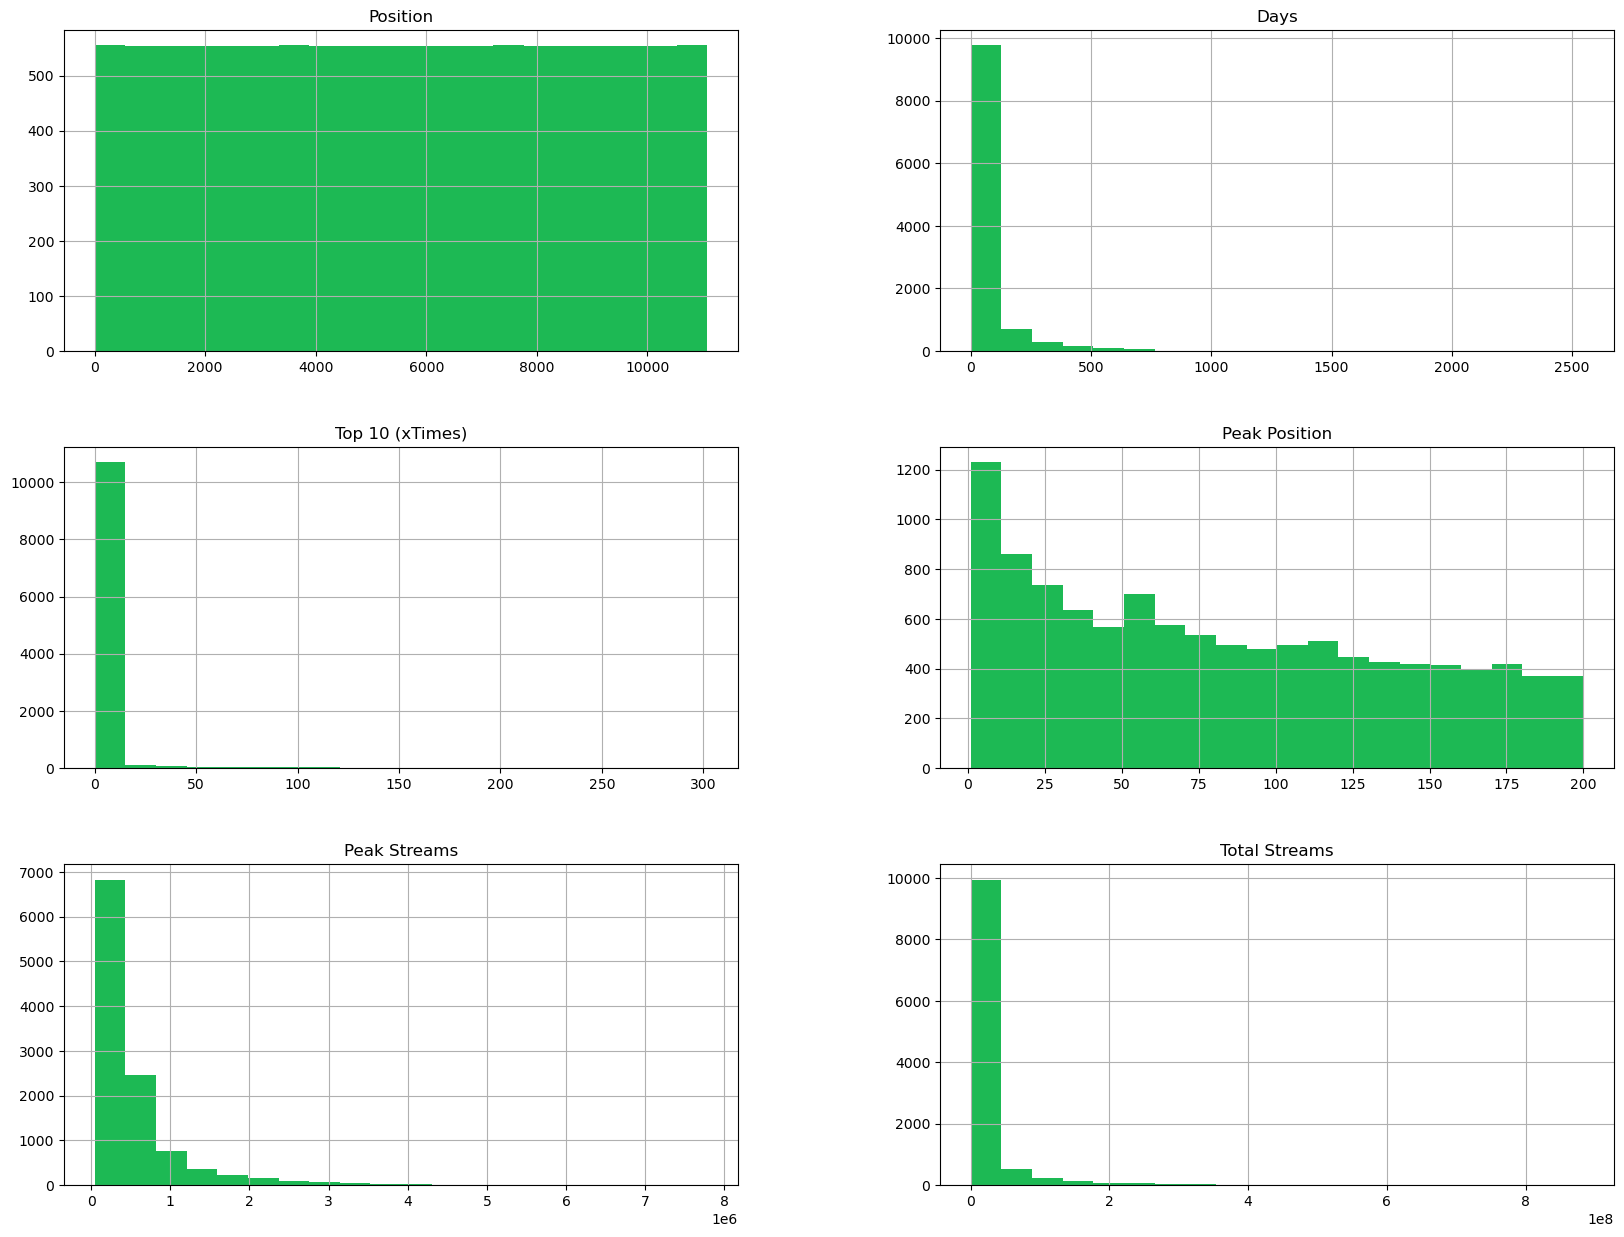

In [9]:
spotify_dataframe.hist(bins=20, figsize=(20,15), color=["#1DB954"])
plt.show()

### Observations:
#### 1. Position: As each song has one position we can see that it is normally distributed
#### 2. Days, Top 10(xtimes), Peak Streams, Total Streams are heavily right-skewed which means that there are many songs with low values and very few songs with high values
#### 3. Peak position: 1200 out of total number of songs have achieved peak atleast once. 

### Explore the relationship between various columns

#### 1. Most popular artists on Spotify

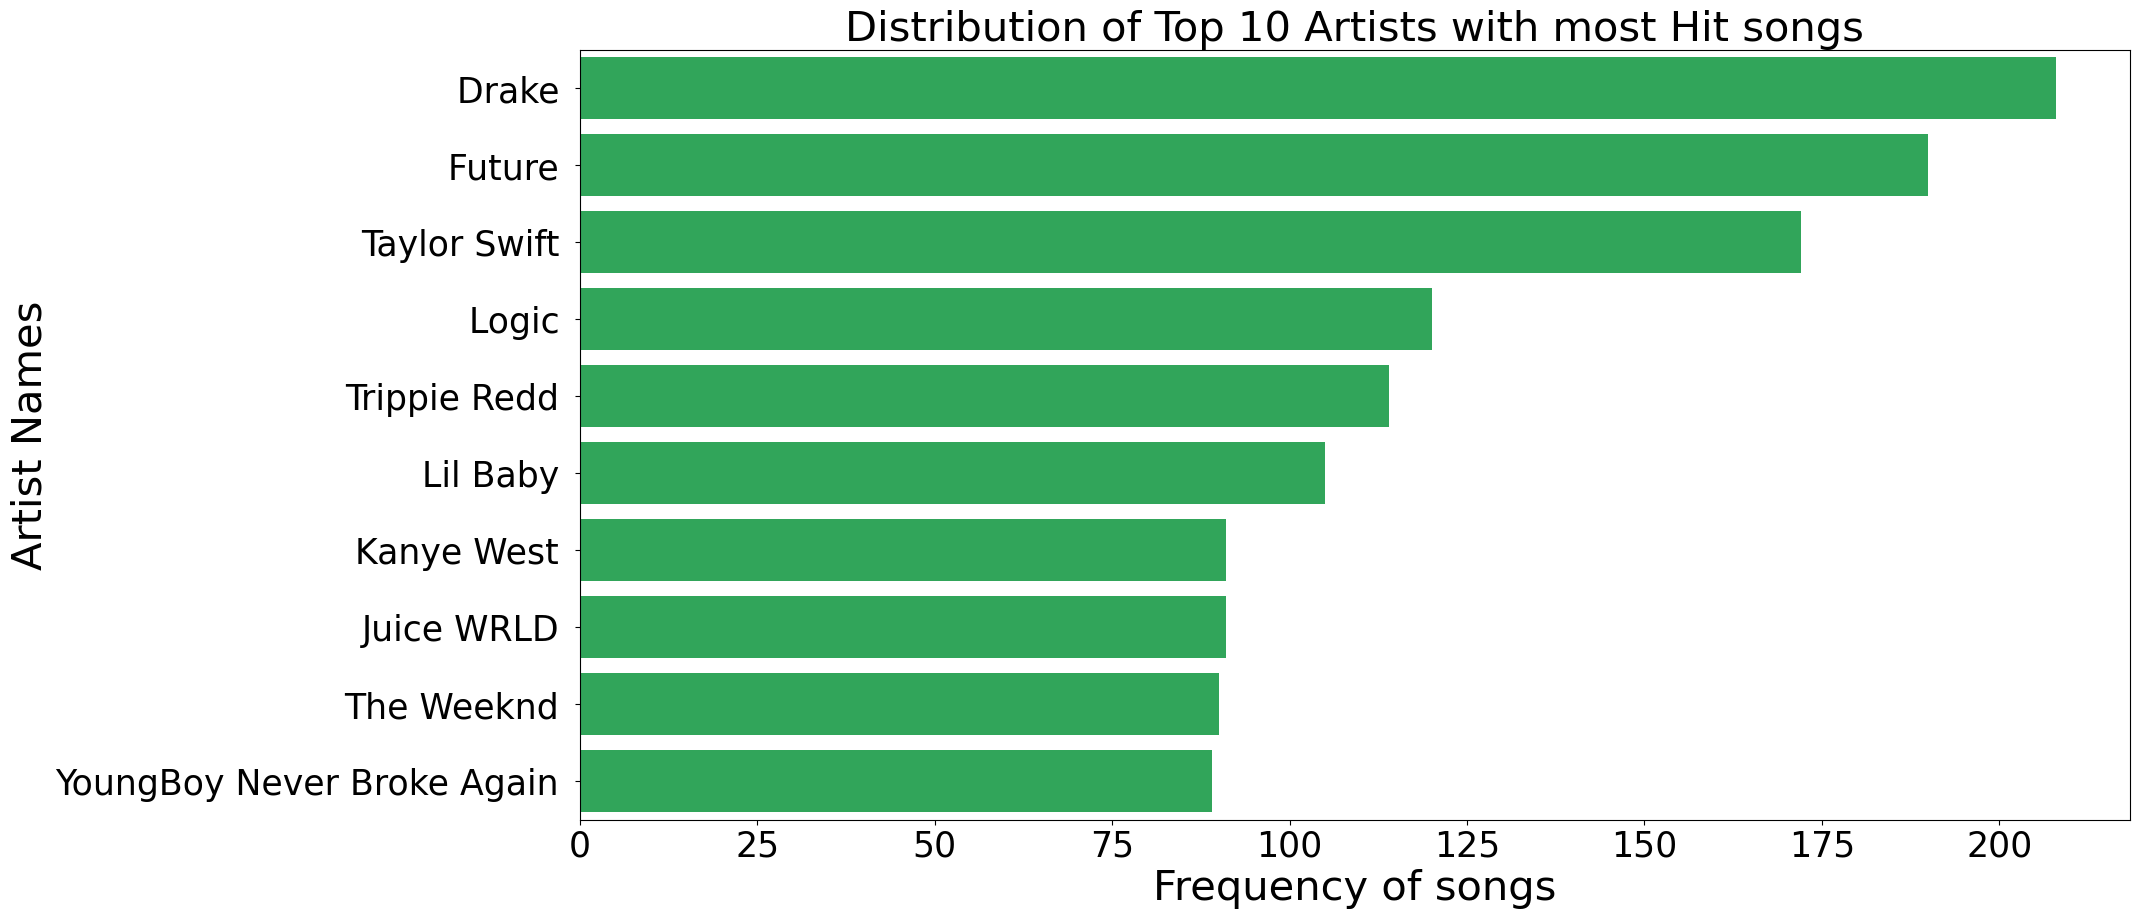

In [10]:
plt.figure(figsize=(20, 10))

# Group by 'Artist Name' and get the count of songs for each artist
totalNoOfArtists = spotify_dataframe.groupby('Artist Name').size().sort_values(ascending=False)
top10ArtistsAccordingFrequent = totalNoOfArtists.head(10)

sns.barplot(y=top10ArtistsAccordingFrequent.index, x=top10ArtistsAccordingFrequent.values, color="#1DB954")

plt.title("Distribution of Top 10 Artists with most Hit songs", size=30)
plt.ylabel("Artist Names", size=30)
plt.xlabel("Frequency of songs", size=30)
plt.xticks(size=25)
plt.yticks(size=25)
plt.show()

#### 2. Most popular song on Spotify

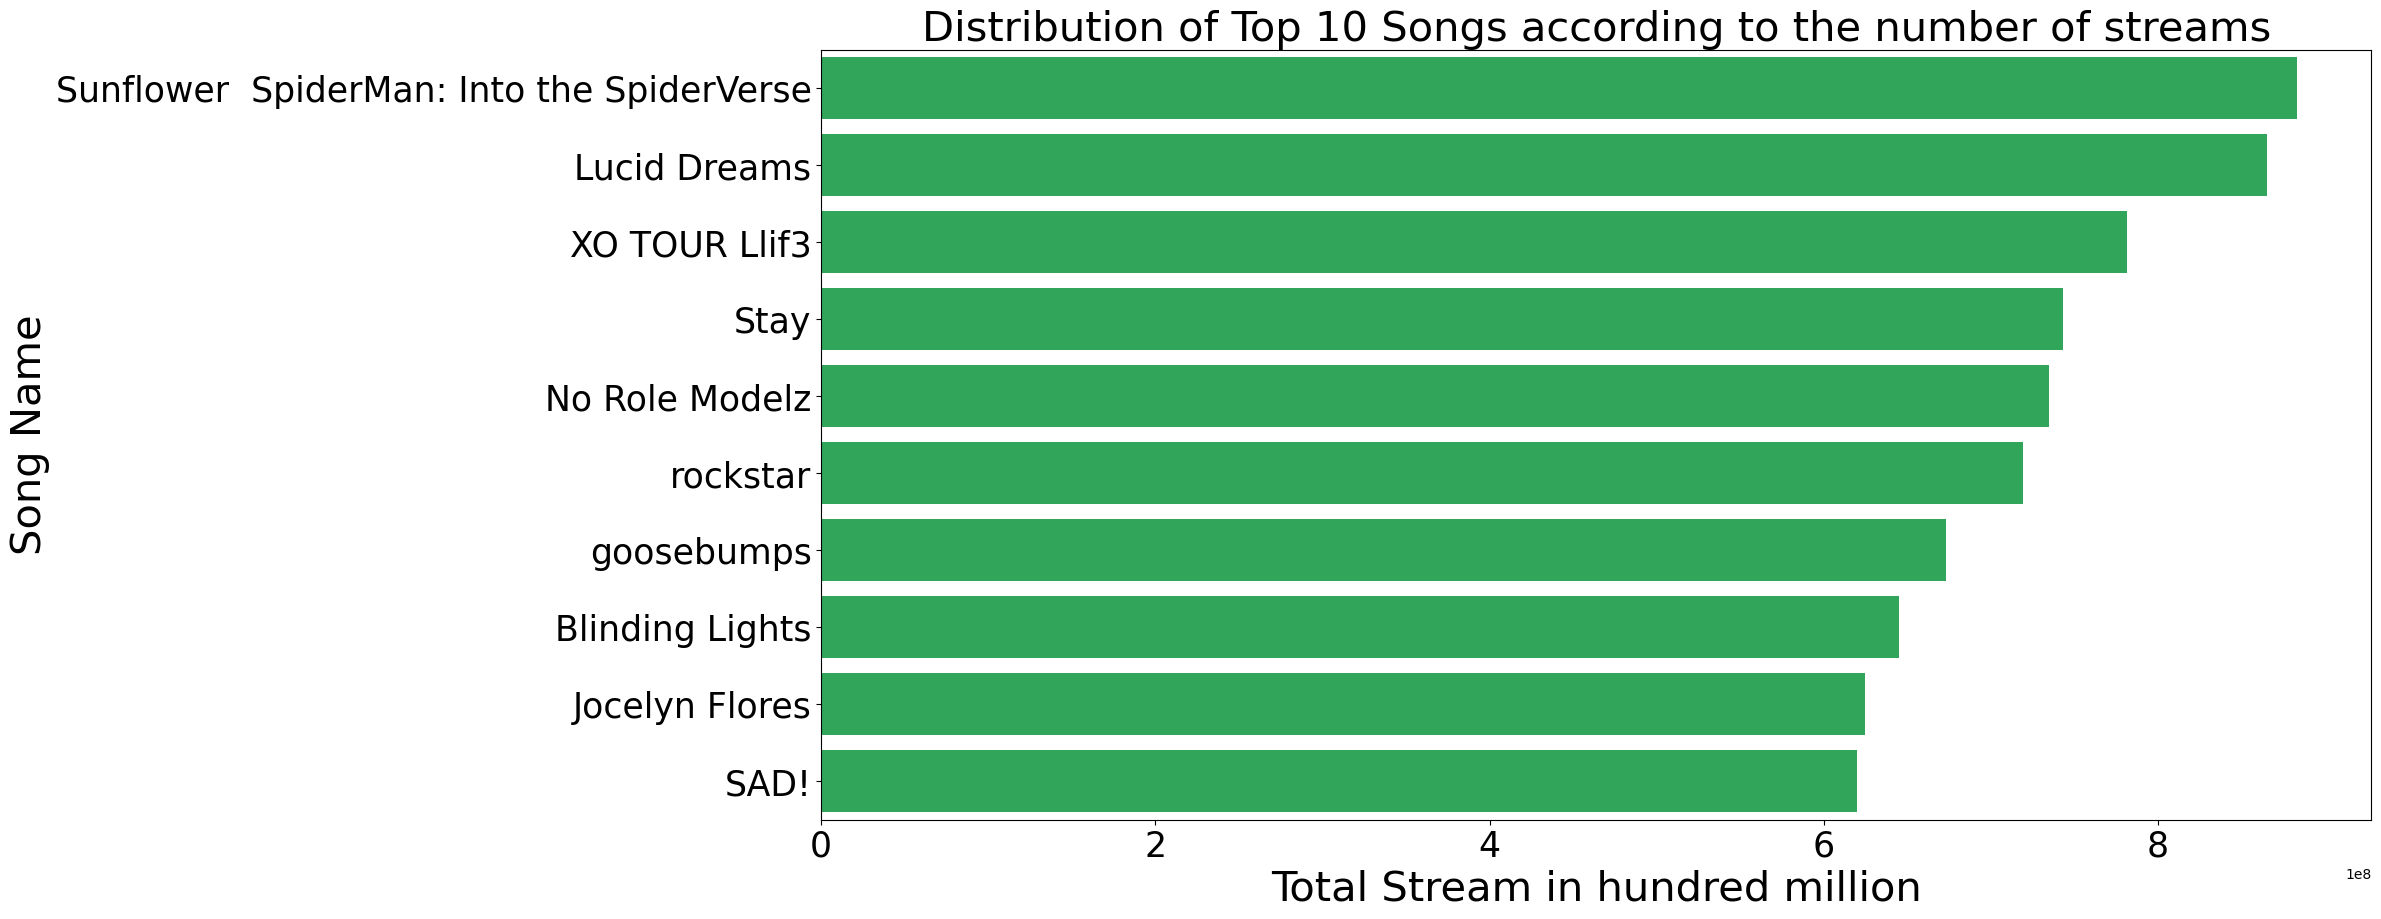

In [11]:
plt.figure(figsize=(20, 10))

# Group by 'Song Name' and 'Total Streams' to get top 10 songs based on streams

top10SongAccordingToStreams = spotify_dataframe.groupby('Song Name')['Total Streams'].sum().sort_values(ascending=False)
top10Songs = top10SongAccordingToStreams.head(10)

sns.barplot(y=top10Songs.index, x=top10Songs.values, color="#1DB954")

plt.title("Distribution of Top 10 Songs according to the number of streams", size=30)
plt.ylabel("Song Name", size=30)
plt.xlabel("Total Stream in hundred million", size=30)
plt.xticks(size=25)
plt.yticks(size=25)
plt.show()

#### 3. Most popular artist on Spotify according to Peak Stream

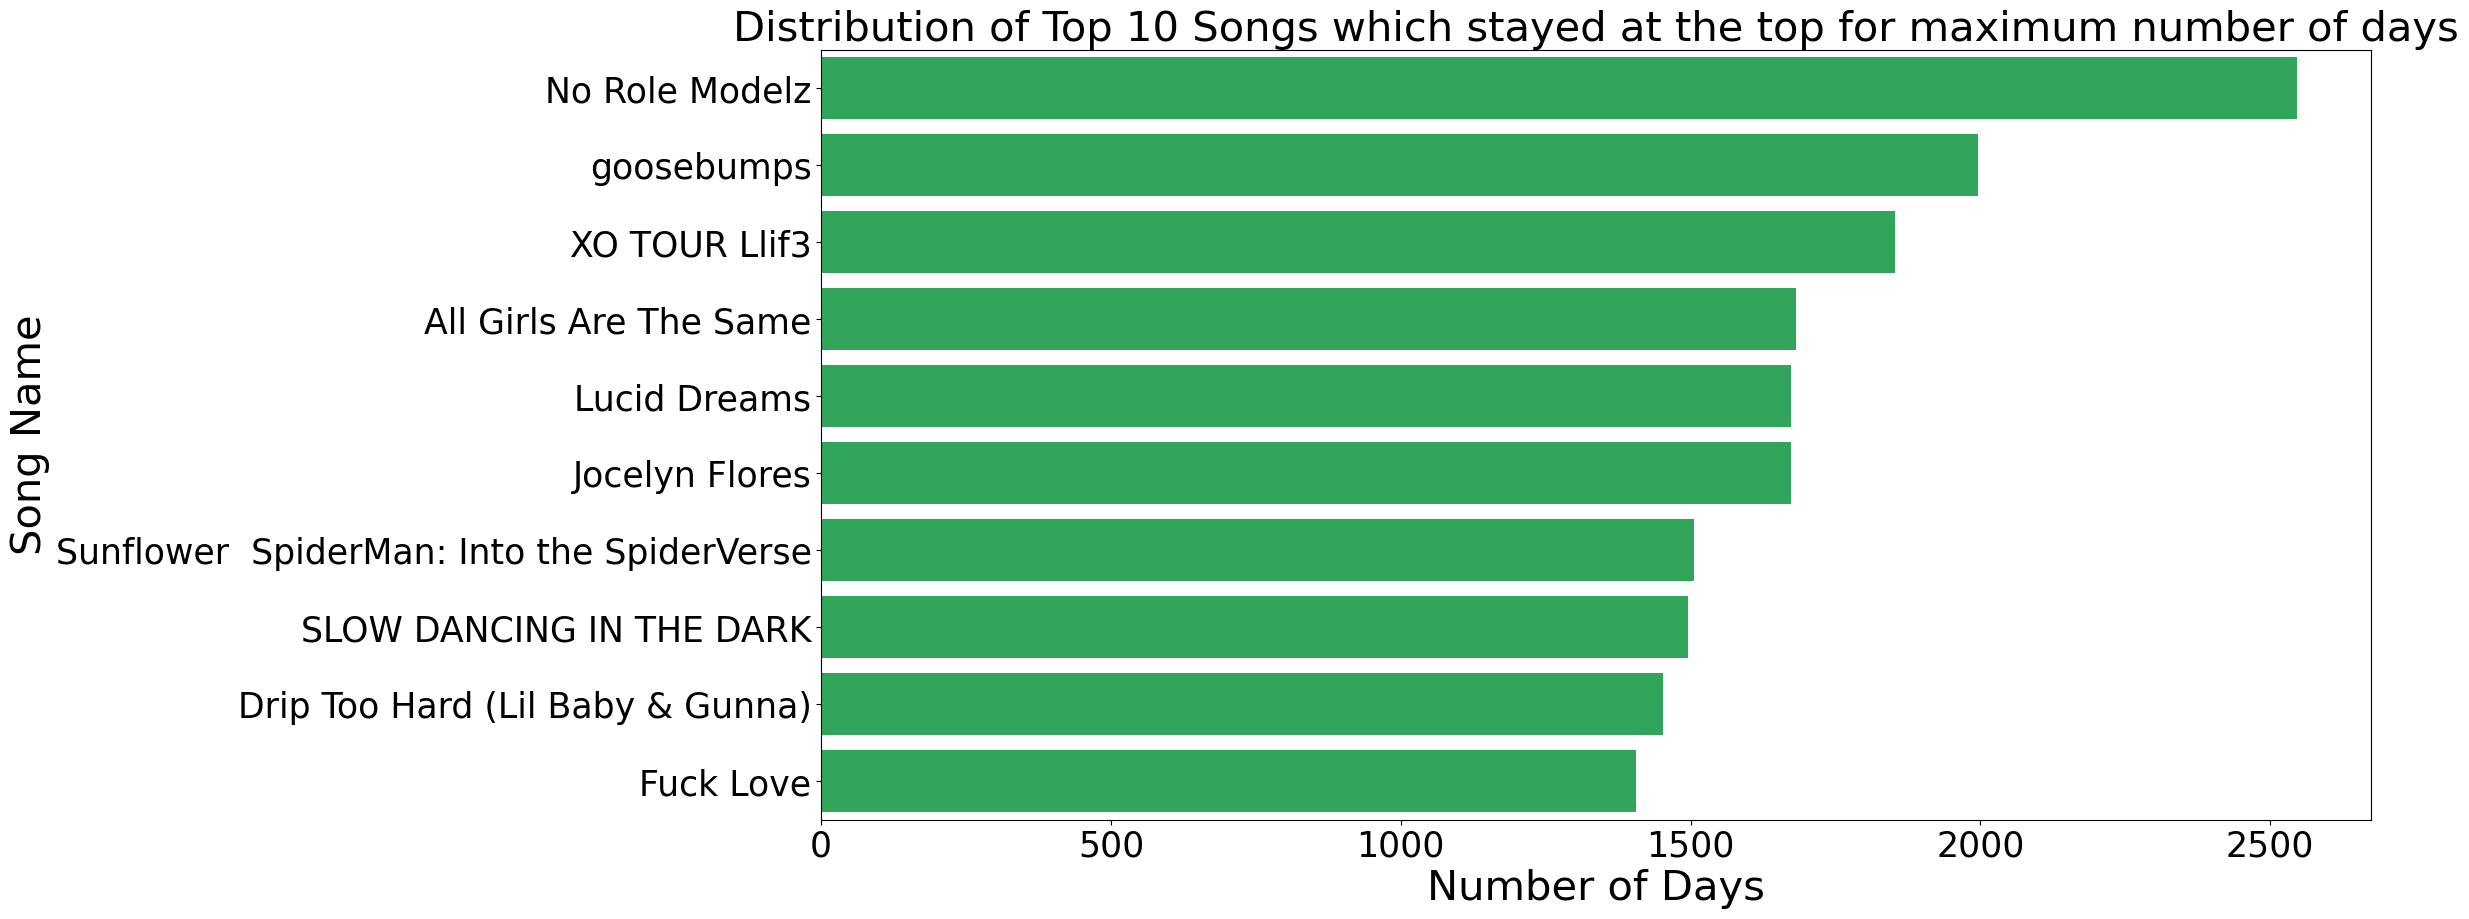

In [12]:
plt.figure(figsize=(20, 10))

# Group by 'Song Name' and 'Days' to get top 10 songs which played for longest days

topSongsAccordingMaxDays = spotify_dataframe.groupby('Song Name')['Days'].sum().sort_values(ascending=False)
top10SongAccordingToDays = topSongsAccordingMaxDays.head(10)

sns.barplot(y=top10SongAccordingToDays.index, x=top10SongAccordingToDays.values, color="#1DB954")

plt.title("Distribution of Top 10 Songs which stayed at the top for maximum number of days", size=30)
plt.ylabel("Song Name", size=30)
plt.xlabel("Number of Days", size=30)
plt.xticks(size=25)
plt.yticks(size=25)
plt.show()

#### 3. Most popular artist on Spotify according to Peak Stream

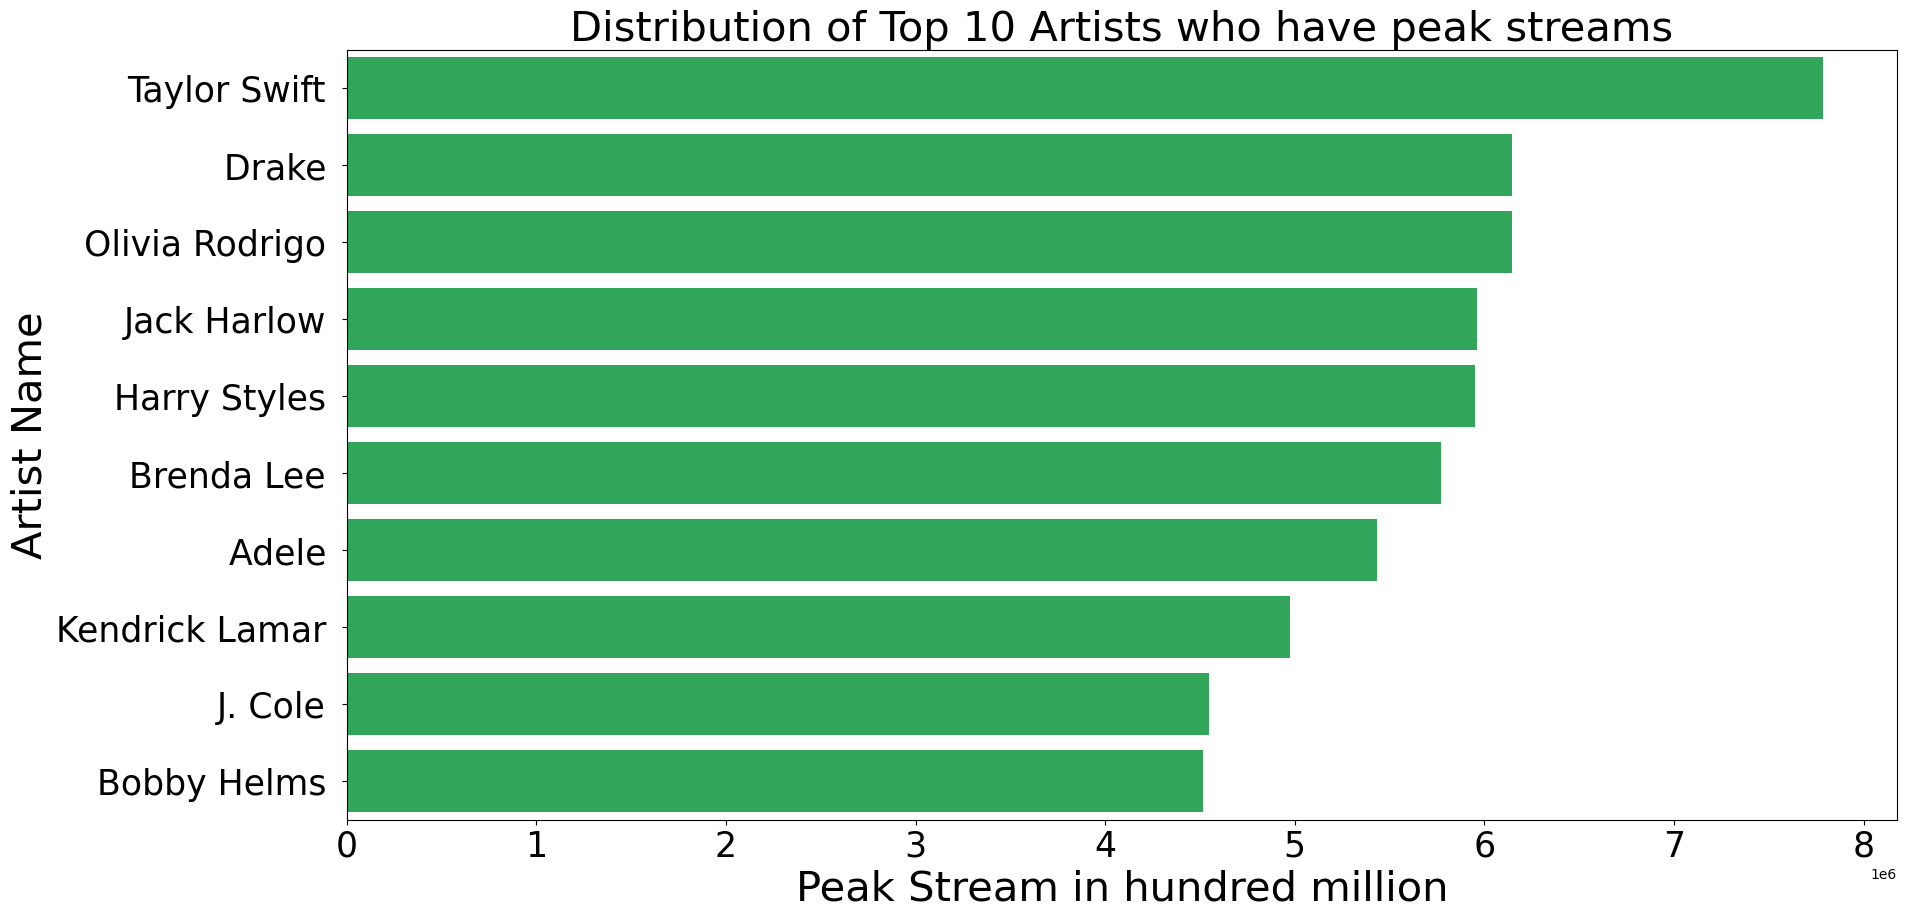

In [13]:
plt.figure(figsize=(20, 10))

# Group by 'Artist Name' and 'Peak Streams' to get top 10 Artists who have peak streams
topPeakStreamArtists = spotify_dataframe.groupby('Artist Name')['Peak Streams'].max().sort_values(ascending=False)
top10ArtistsAccordingToPeakStream = topPeakStreamArtists.head(10)

sns.barplot(y=top10ArtistsAccordingToPeakStream.index, 
            x=top10ArtistsAccordingToPeakStream.values, color="#1DB954")

plt.title("Distribution of Top 10 Artists who have peak streams", size=30)
plt.ylabel("Artist Name", size=30)
plt.xlabel("Peak Stream in hundred million", size=30)
plt.xticks(size=25)
plt.yticks(size=25)
plt.show()

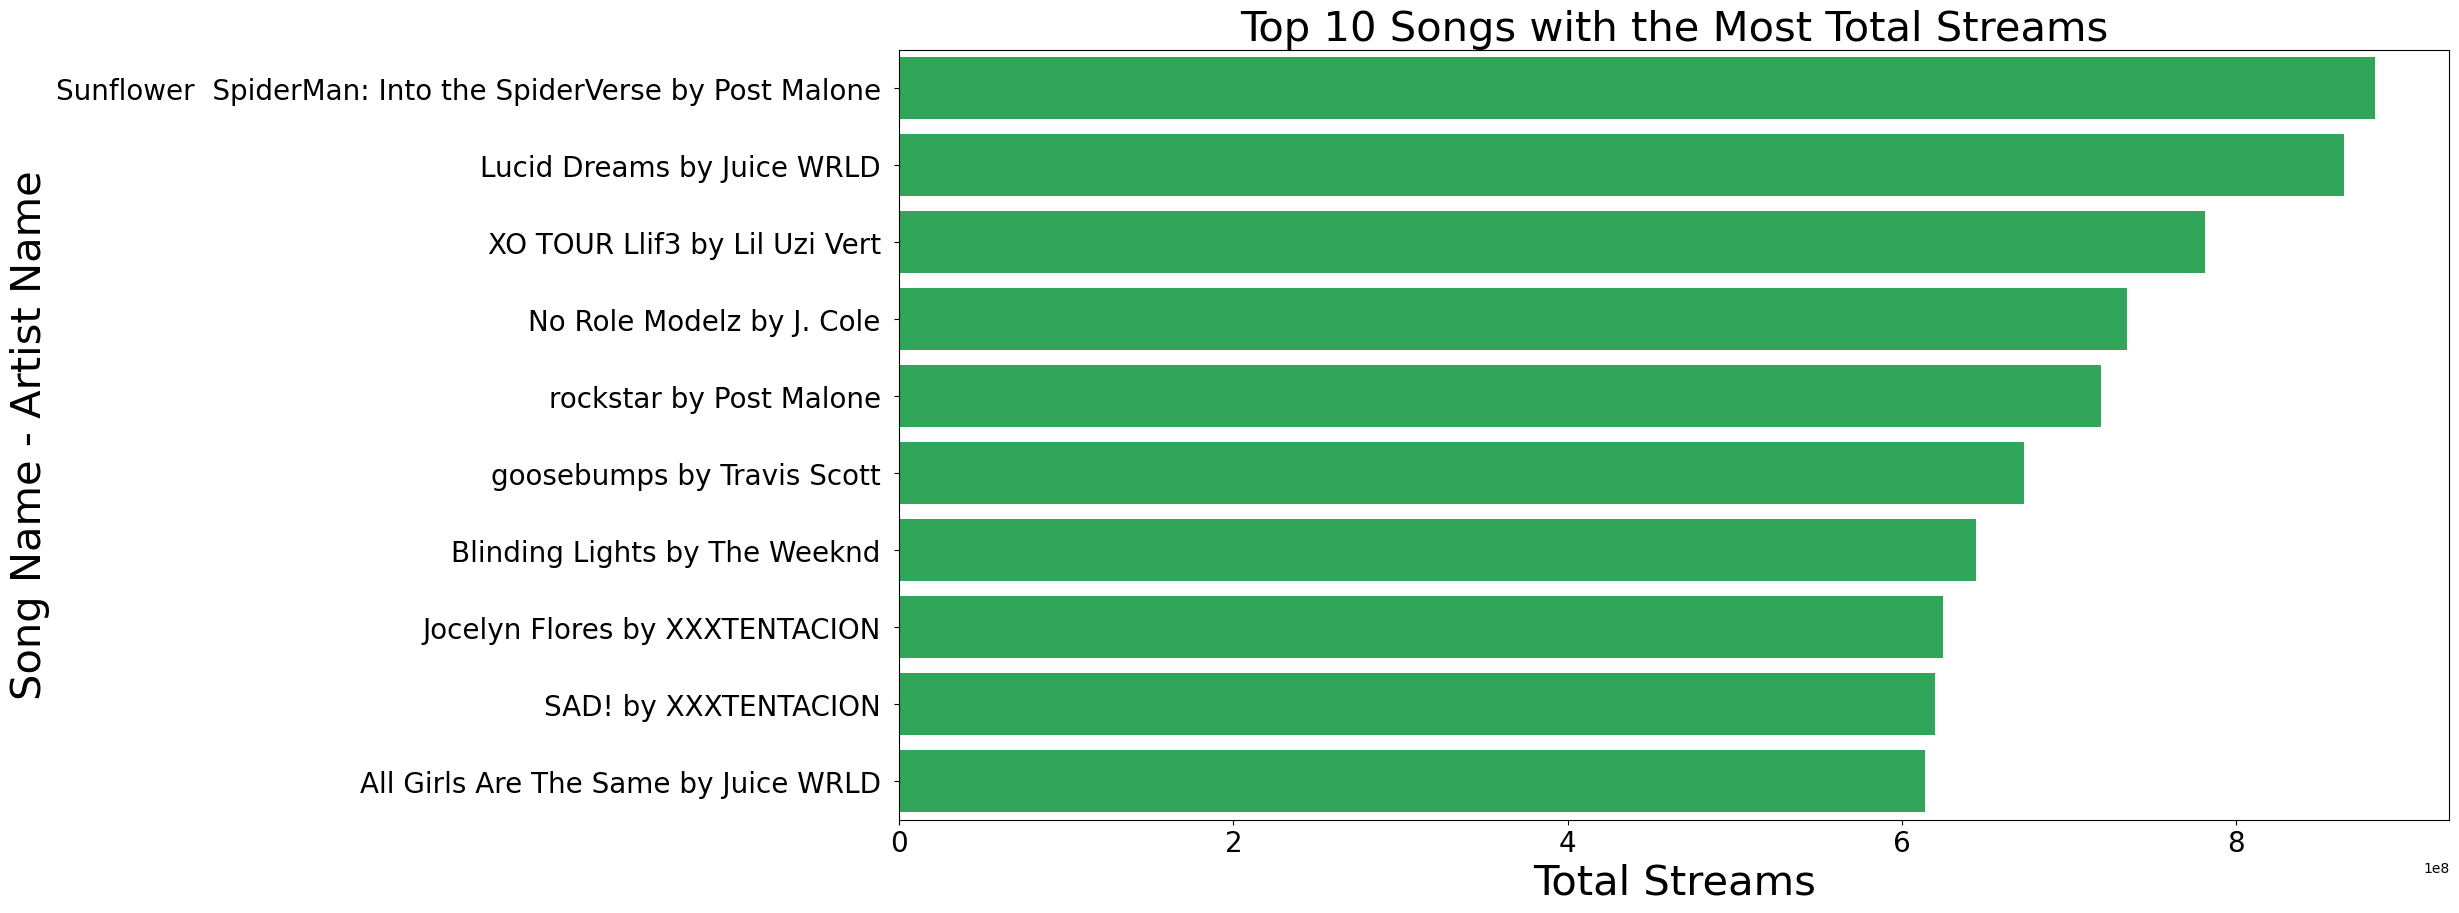

In [14]:
plt.figure(figsize=(20, 10))

top10SongsAccordingToTotalStreamed = spotify_dataframe.sort_values(by='Total Streams', ascending=False).head(10)
top10SongsAccordingToTotalStreamed['Song-Artist'] = top10SongsAccordingToTotalStreamed['Song Name'] + ' by ' + top10SongsAccordingToTotalStreamed['Artist Name']

colors = ["#1DB954"]

sns.barplot(y='Song-Artist', x='Total Streams', data=top10SongsAccordingToTotalStreamed, color="#1DB954")
plt.title("Top 10 Songs with the Most Total Streams", size=30)
plt.ylabel("Song Name - Artist Name", size=30)
plt.xlabel('Total Streams', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

In [15]:
features = ['Days', 'Top 10 (xTimes)', 'Peak Position', 'Peak Streams']
X = spotify_dataframe[features]
y = spotify_dataframe['Total Streams']

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
linear_reg_model = LinearRegression()

# Train the model
linear_reg_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = linear_reg_model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f'Linear Regression Model:')
print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R-squared Score: {r2}')

Linear Regression Model:
Mean Absolute Error: 5122969.306442096
Mean Squared Error: 152858922381574.9
Root Mean Squared Error: 12363612.836933019
R-squared Score: 0.9540917665463367


### Observations: 
#### 1. The Linear Regression model demonstrates a strong fit to the provided dataset.
#### 2. The high R-squared value of 0.9541 indicates that approximately 95.41% of the variance in total streams is explained by the model.
#### 3. However, the elevated Mean Absolute Error(MAE) of 5.12e6, Mean Squared Error (MSE) of 1.53e14 and Root Mean Squared Error (RMSE) of 1.24e7 suggest the presence of substantial prediction errors, possibly influenced by the large scale of the target variable. Further consideration of alternative regression techniques may enhance model performance.

In [17]:
# Create a Decision Tree model
decision_tree_model = DecisionTreeRegressor(random_state=42)

# Train the model
decision_tree_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_tree = decision_tree_model.predict(X_test)

# Evaluate the model
mae_tree = mean_absolute_error(y_test, y_pred_tree)
mse_tree = mean_squared_error(y_test, y_pred_tree)
rmse_tree = mean_squared_error(y_test, y_pred_tree, squared=False)
r2_tree = r2_score(y_test, y_pred_tree)

print(f'Decision Tree Model:')
print(f'Mean Absolute Error: {mae_tree}')
print(f'Mean Squared Error: {mse_tree}')
print(f'Root Mean Squared Error: {rmse_tree}')
print(f'R-squared Score: {r2_tree}')

Decision Tree Model:
Mean Absolute Error: 3045449.3871841156
Mean Squared Error: 115242028557308.16
Root Mean Squared Error: 10735084.003272083
R-squared Score: 0.9653892761491798


### Observations:
#### 1. The Decision Tree Regressor performed reasonably well on the provided dataset.
#### 2. The R-squared value of 0.9654 indicates that the Decision Tree model explains approximately 96.54% of the variance in the total streams, suggesting a strong ability to capture the underlying patterns in the data.
#### 3. However, the elevated Mean Absolute Error(MAE) of 3.05e6,  Mean Squared Error (MSE) of 1.15e14  and Root Mean Squared Error (RMSE) of 1.07e7 suggest the presence of prediction errors. It's worth considering ensemble methods like Random Forest could further enhance predictive performance.

In [18]:
# Create a Random Forest model
random_forest_model = RandomForestRegressor(random_state=42)

# Train the model
random_forest_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = random_forest_model.predict(X_test)

# Evaluate the model
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = mean_squared_error(y_test, y_pred_rf, squared=False)
r2_rf = r2_score(y_test, y_pred_rf)

print(f'Random Forest Model:')
print(f'Mean Absolute Error: {mae_rf}')
print(f'Mean Squared Error: {mse_rf}')
print(f'Root Mean Squared Error: {rmse_rf}')
print(f'R-squared Score: {r2_rf}')

Random Forest Model:
Mean Absolute Error: 2315066.6877752705
Mean Squared Error: 88895682358334.06
Root Mean Squared Error: 9428450.68706063
R-squared Score: 0.9733018938303007


### Observations: 
#### 1. The Random Forest Regressor has demonstrated an excellent performance.
#### 2. The R-squared value of 0.9733 indicates that the Random Forest model explains approximately 97.33% of the variance in total streams, signifying a robust ability to capture complex patterns in the data.
#### 3.The Mean Absolute Error(MAE) of 2.32e6, Mean Squared Error (MSE) of 8.89e13 and Root Mean Squared Error (RMSE) of 9,43e6 are significantly lower when compared to the Decision Tree model suggesting a substantial reduction in prediction errors, highlighting the effectiveness of the Random Forest ensemble in improving predictive accuracy.

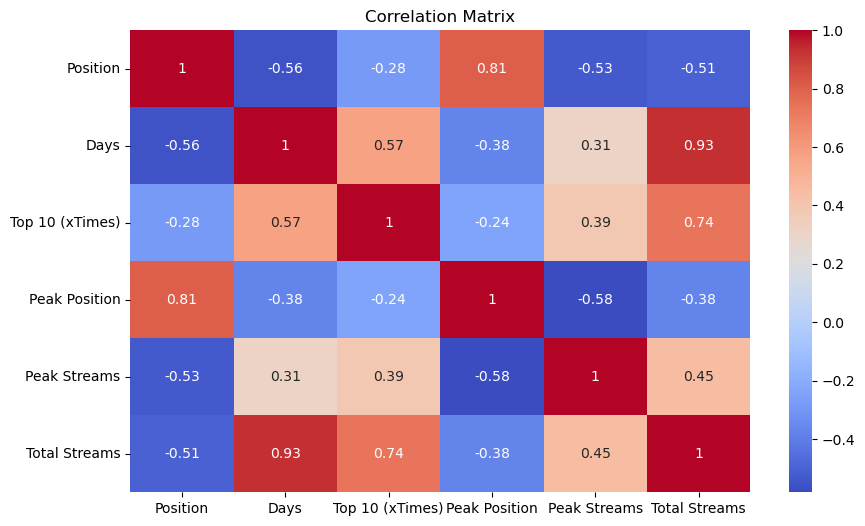

In [19]:
numeric_data = spotify_dataframe.select_dtypes(include=[np.number])

correlation_matrix = numeric_data.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

### Observations:
#### 1. Position Vs Total Stream (-0.51): There is a moderate negative correlation between the position on the chart and the total streams, suggesting that as the position increases, the total streams tend to decrease.
#### 2. Days vs. Total Streams (0.93): There is a strong positive correlation between the number of days on the chart and total streams. This indicates that songs that stay on the chart for more days tend to accumulate higher total streams.
#### 3. Top 10 (xTimes) vs. Total Streams (0.74): There is a strong positive correlation between the number of times a song is in the top 10 and total streams. Songs that achieve top 10 status more frequently tend to have higher total streams.
#### 4. Peak Position vs. Total Streams (-0.38): There is a moderate negative correlation between the peak position and total streams. This suggests that as the peak position improves (lower values), the total streams tend to increase.
#### 5. Peak Streams vs. Total Streams (0.45): There is a moderate positive correlation between the peak streams and total streams. Higher peak stream values are associated with higher total streams.

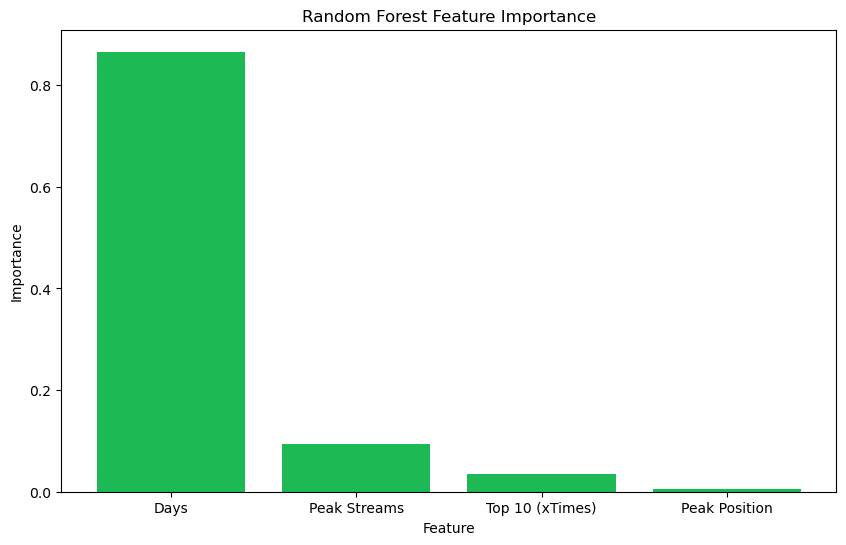

In [20]:
feature_importances = random_forest_model.feature_importances_

# Get feature names
feature_names = X_train.columns

# Sort feature importances in descending order
indices = feature_importances.argsort()[::-1]

# Plot the bar chart
plt.figure(figsize=(10, 6))
plt.bar(range(X_train.shape[1]), feature_importances[indices], align="center", color=["#1DB954"])
plt.xticks(range(X_train.shape[1]), feature_names[indices])
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("Random Forest Feature Importance")
plt.show()

### Feature Importances:
- #### The bar plot depicting feature importances in the Random Forest model reveals the relative contribution of each feature to the prediction of total streams.
- #### 'Days' appears to be the most influential feature, followed by 'Peak Streams' and 'Top 10 (xTimes)' , emphasizing their importance in determining total streams.
- #### Feature importances provide insights into the variables that significantly impact the model's predictions, aiding in the interpretation of the model's decision-making process.

## Conclusion:
#### To conclude, we used data from Spotify’s Top 10,000 Streamed Songs to analyze the most popular songs and artists on Spotify. The machine learning algorithms we applied for analysis included Linear Regression, Decision Tree Regressor, and Random Forest Regressor.

#### We found that the Random Forest Regressor is the best fit with the lowest Mean Absolute Error(MAE) of 2.32e6, Mean Squared Error (8.89e13), the lowest Root Mean Squared Error (9.43e6), and the highest R-squared (97.33%) values when compared to the Decision Tree and Linear Regression. The Decision Tree with Mean Absolute Error(MAE) of 3.05e6, Mean Squared Error (1.15e14), Root Mean Squared Error (1.073e7), and R-squared of (96.54%) performed better than Linear Regression with  Mean Absolute Error(MAE) of 5.12e6, Mean Squared Error (1.53e14), Root Mean Squared Error (1.24e7), and R-squared (95.41%).

#### In conclusion, the Random Forest Regressor emerges as the most promising model for this task, demonstrating superior predictive performance and showcasing its dominance in today's music industry.